## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# import the dataset from the csv file
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# print the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
# the number of unique users of the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
# the proportion of users converted 
prop_con = df.query('converted == 1').shape[0] / df.shape[0]
prop_con

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# print the number of times the new_page and treatment don't line up. 
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
# Check if there are any rows have missing values
df.isna().sum().any()

False

**That means there are no missing values**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# store the correct rows in df2
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")').copy()

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
# print the number of rows in the new dataframe
df2.shape[0]

290585

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
# print the number of unique users in the new dataframe
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Check the duplicated user id
repeated_user = (df2.user_id.value_counts() > 1).index[0]
repeated_user 

773192

c. What is the row information for the repeat **user_id**? 

In [13]:
# print the rows of repeated users
df2[df2['user_id'] == repeated_user]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# remove one row of repeated user id
df2 = df2.drop(1899, axis = 0)
df2.shape[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
# the probability of an individual converting regardless of the page they receive
prob_con = df2.query("converted == 1").shape[0] / df2.shape[0]
prob_con

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
# the probability they converted in the 'control' group
prob_control_con = df2.query("converted == 1 and group == 'control'").shape[0] / df2.query("group == 'control'").shape[0]
prob_control_con

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
# the probability they converted in the 'treatment' group
prob_treat_con = df2.query("converted == 1 and group == 'treatment'").shape[0] / df2.query("group == 'treatment'").shape[0]
prob_treat_con

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
# the probability that an individual received the new page
prop_new_page = df2.query("landing_page == 'new_page'").shape[0] / df2.shape[0]
prop_new_page

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**As we can see there is no large enough probability for the people who converted to say that the new treatment page leads to more convert rate since the probability of individual converting in control group is 0.1204 and the probability of individual converting in treatment group is 0.1188.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

1. $H_{0}$ : $P_{new}$ <= $P_{old}$ 
2. $H_{1}$ : $P_{new}$ > $P_{old}$ 

or

1. $H_{0}$ : $P_{new}$ - $P_{old}$ <= 0
2. $H_{1}$ : $P_{new}$ - $P_{old}$ > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# the convert rate of the dataset for p_new
p_new = df2.query('converted == 1').shape[0] / df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
# the convert rate of the dataset for p_old
p_old = df2.query('converted == 1').shape[0] / df2.shape[0]
p_old

0.11959708724499628

In [21]:
# probablity under null
prop = np.mean([p_old,p_new])
print(prop)

0.11959708724499628


**Under the null p_new = p_old**

c. What is $n_{new}$?

In [22]:
# number of new page users
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [23]:
# number of old page users
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
# simulated new page 
new_page_converted = np.random.choice([0,1], p = [1-p_new, p_new] , size = n_new )
new_page_converted

array([0, 0, 1, ..., 0, 0, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
# simulated old page 
old_page_converted = np.random.choice([0,1], p = [1-p_old, p_old] , size = n_old )
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# the difference of observations
obs_diff = new_page_converted.mean() - old_page_converted.mean()
obs_diff

0.0020695517038760436

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
# simulate 10000 trials 
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

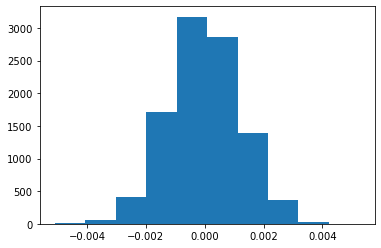

In [28]:
# plot the p_diffs
plt.hist(p_diffs);

In [29]:
# CTR of the p_new
p_new_ctr = df2.query('landing_page == "new_page"').converted.mean()
p_new_ctr

0.11880806551510564

In [30]:
# CTR of the p_old
p_old_ctr = df2.query('landing_page == "old_page"').converted.mean()
p_old_ctr

0.1203863045004612

In [31]:
# the actual difference of observations
act_diff = p_new_ctr - p_old_ctr 
act_diff

-0.0015782389853555567

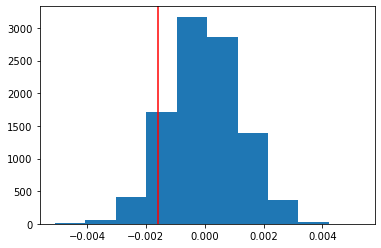

In [32]:
# plot the null vals with the actual diffs
plt.hist(p_diffs)
plt.axvline(x = act_diff, color = 'r')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
(p_diffs > act_diff).mean()

0.9052

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1. **The value computed is in scientific studies called P_Value which is  the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.**
2. **About 90% of the population is greater than p_diffs which shows that new page isn't significantly better than the old page.**
3. **Since the P_value is greater than α = 0.05, so we fail to reject the null. And it says that the new page doesn't have higher probablity of convert rate than the old page.**


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [34]:
# import statsmodels module
import statsmodels.api as sm

# set the paramaters for the z-test
convert_old = df2.query('converted == 1 and landing_page == "old_page"').shape[0]
convert_new = df2.query('converted == 1 and landing_page == "new_page"').shape[0]
n_old = df2.query('landing_page == "old_page"').shape[0]
n_new = df2.query('landing_page == "new_page"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [35]:
# implement z-test
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative = 'smaller')
print("Z-test score = {}, P_value = {}".format(z_score, p_value))

Z-test score = 1.3109241984234394, P_value = 0.9050583127590245


In [36]:
from scipy.stats import norm

# compute critical value of confidence
print("Critical value of confidence: {}".format(norm.ppf(1-(0.05))))

Critical value of confidence: 1.6448536269514722


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Since z_score = 1.31 is less than the critical value of 95% confidence which equals 1.645. Also the P_value is  0.905 greater than α = 0.05, then we fail to reject the null hypothesis and they do agree with the findings in parts j and k.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

### Logistic Regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# set the intercept
df2['intercept'] = 1

# set the dummy column of treatment
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [38]:
# Set X, and y to a logistic model
X = df2[['intercept','ab_page']]
y = df2['converted']

In [39]:
# Train the logistic Regression model
model = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [40]:
# print the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               8.077e-06
Time:                        15:54:43   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

__The p_value associated with ab_page is 0.19, in *Part II* I got different P_value because in *part II*, we computed the P_value for the larger side of the alternative hypothesis, but in *logistic regression*, we computed the alternative hypothesis for two sides $P_{new}$ != $P_{old}$.__

### In Logistic Regression Model
1. $H_{0}$ : $P_{new}$ = $P_{old}$ 
2. $H_{1}$ : $P_{new}$ != $P_{old}$ 

or

1. $H_{0}$ : $P_{new}$ - $P_{old}$ = 0
2. $H_{1}$ : $P_{new}$ - $P_{old}$ != 0

### In Part II
1. $H_{0}$ : $P_{new}$ <= $P_{old}$ 
2. $H_{1}$ : $P_{new}$ > $P_{old}$ 

or

1. $H_{0}$ : $P_{new}$ - $P_{old}$ <= 0
2. $H_{1}$ : $P_{new}$ - $P_{old}$ > 0

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**We can clearly see that the treatment and control page doesn't have large impact on the convert rate, that is why i see that looking at other factors it may be a good idea, The disadvatages to adding additional terms is that we don't know in which direction our additional factors will influence the convert rate.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [41]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [42]:
countries = df_new.country.unique()
countries

array(['UK', 'US', 'CA'], dtype=object)

In [43]:
# Create the necessary dummy variables
df_new[countries[:-1]] =  pd.get_dummies(df_new['country'])[countries[:-1]]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [44]:
# Fit Your Linear Model And Obtain the Results
X_countries = df_new[['intercept', 'ab_page', 'UK', 'US']]
y_countries = df_new['converted']
countries_model = sm.Logit(y_countries, X_countries).fit()

# print the model summary
countries_model.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               2.323e-05
Time:                        15:54:46   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Based on the P_values above, it does not appear that the country factor has an impact on the convert rate as there is no P_value less than α = 0.05 So we fail to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
# Create the ab_page for each country
for country in countries[:-1]:
    new_column = str(country)+'_ab_page'
    df_new[new_column] = df_new[country] * df_new['ab_page']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [46]:
# Fit Your Linear Model And Obtain the Results
X_countries = df_new[['intercept','ab_page', 'UK', 'US', 'UK_ab_page','US_ab_page']]
y_countries = df_new['converted']
countries_model = sm.Logit(y_countries, X_countries).fit()

# print the model summary
countries_model.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Oct 2022   Pseudo R-squ.:               3.482e-05
Time:                        15:54:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

1. **Based on the P_values above, none of them appears as statistically significant as none of them is less than α = 0.05, So we fail to reject the null hypotthesis as there is no enough evidence that the new page results in more convert rate than the old page.**

2. **Simply we can say that we don't have sufficient evidence that the new page has more convert than the old page, therefore the old page has higher convert rate**

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.